# Data Exploration

Cherry blossom phenology data and weather data are explored in this notebook.


# Cherry Blossom Data Exploration

This section explores the cherry blossom phenology dataset, including descriptive statistics, feature distributions, correlations, and trends.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
cherry_df = pd.read_csv('../data/cherry_blossom_data.csv')
cherry_df.head()


,year,days_dec_ge_45,days_jan_ge_45,days_feb_ge_45,prec_winter,mean_temp_winter,surface_temp_chg,climate_incidents,bloom_day
0,1921,30,24,23,3.41,42.8,-0.05,3,79
1,1922,20,17,19,2.56,39.1,-0.12,2,97
2,1923,18,15,14,3.12,36.4,-0.18,1,99
3,1924,25,22,25,3.68,43.2,-0.09,4,104
4,1925,16,12,14,2.89,36.8,-0.14,2,86


## 1. Dataset Overview

Display the first few rows and summary statistics of the dataset.

In [2]:
cherry_df.info()
cherry_df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               107 non-null    int64  
 1   days_dec_ge_45     107 non-null    int64  
 2   days_jan_ge_45     107 non-null    int64  
 3   days_feb_ge_45     107 non-null    int64  
 4   prec_winter        107 non-null    float64
 5   mean_temp_winter   107 non-null    float64
 6   surface_temp_chg   107 non-null    float64
 7   climate_incidents  107 non-null    int64  
 8   bloom_day          107 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 7.7 KB


,count,mean,std,min,25%,50%,75%,max
year,107.0,1973.158879,30.188449,1921.000,1947.500,1974.00,1998.500,2025.000
days_dec_ge_45,107.0,19.504673,5.325931,4.000,17.000,19.00,23.500,30.000
days_jan_ge_45,107.0,15.719626,5.915752,3.000,12.000,16.00,20.000,30.000
days_feb_ge_45,107.0,17.822430,5.619731,3.000,14.000,17.00,22.000,29.000
prec_winter,107.0,5.411402,3.087712,2.340,3.065,3.72,7.615,13.840
mean_temp_winter,107.0,39.605607,3.017086,32.900,37.185,39.40,41.950,46.200
surface_temp_chg,107.0,0.331449,0.514453,-0.343,-0.050,0.09,0.652,2.224
climate_incidents,107.0,13.663551,9.153764,1.000,6.000,12.00,20.000,43.000
bloom_day,107.0,93.214953,7.490910,74.000,88.000,94.00,99.000,108.000


## 2. Distribution of Features

Visualize the distribution of each numeric feature.

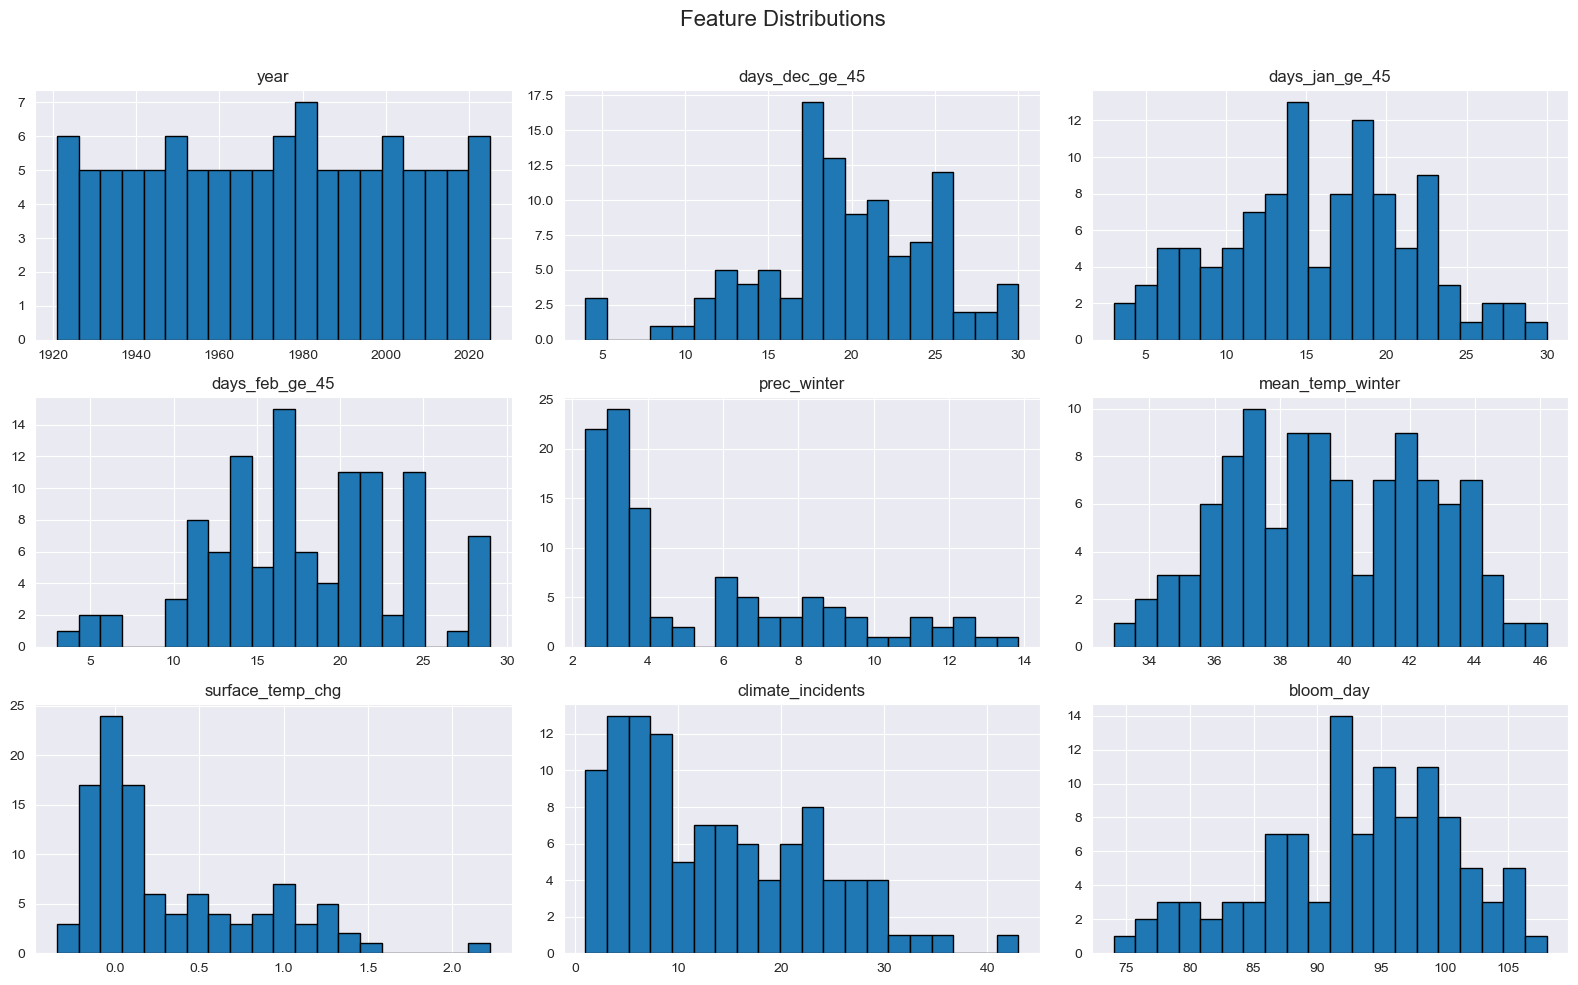

In [3]:
cherry_df.hist(bins=20, figsize=(16, 10), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout(rect=(0, 0, 1, 0.97))
plt.show()


## 3. Correlation Analysis

Show the correlation matrix and highlight highly intercorrelated features.

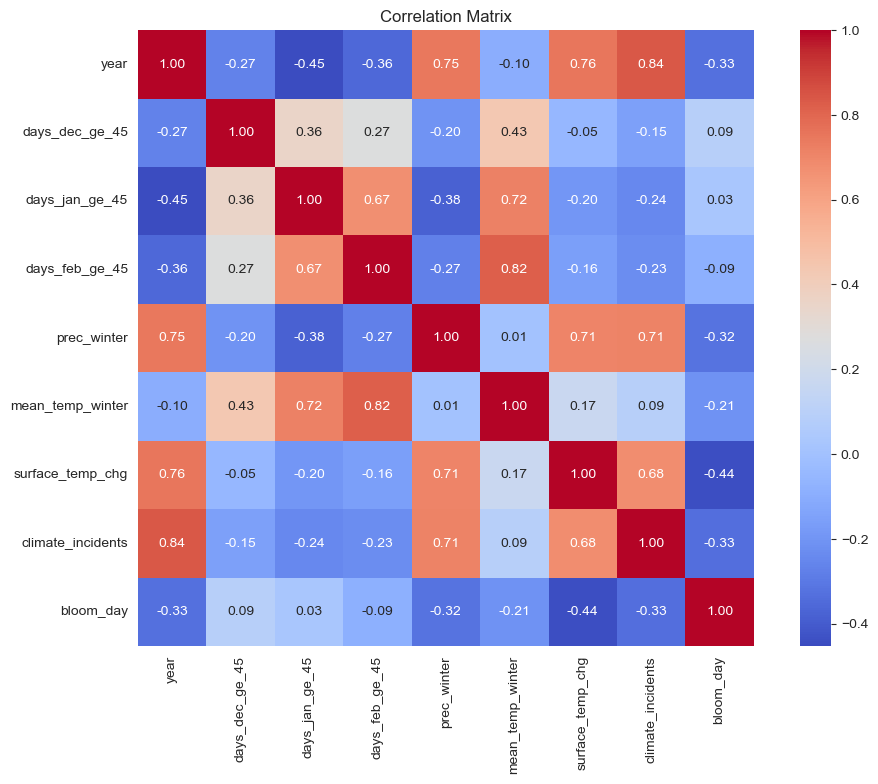

,Feature 1,Feature 2,Correlation
3,year,prec_winter,0.749659
5,year,surface_temp_chg,0.755790
6,year,climate_incidents,0.838006
17,days_jan_ge_45,mean_temp_winter,0.721767
22,days_feb_ge_45,mean_temp_winter,0.821891
27,prec_winter,surface_temp_chg,0.706535
28,prec_winter,climate_incidents,0.710660


In [4]:
corr = cherry_df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Find highly correlated pairs (|corr| > 0.7, excluding self-correlation)
high_corr = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr = high_corr.loc[high_corr['Correlation'].abs() > 0.7]
high_corr


## 4. Trends Over Time

Visualize trends in bloom day and other features over the years.

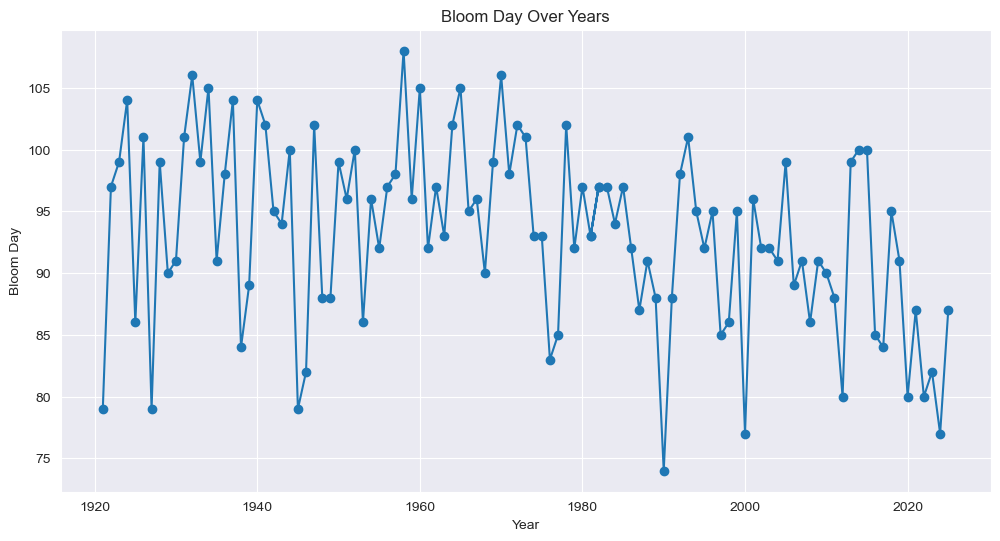

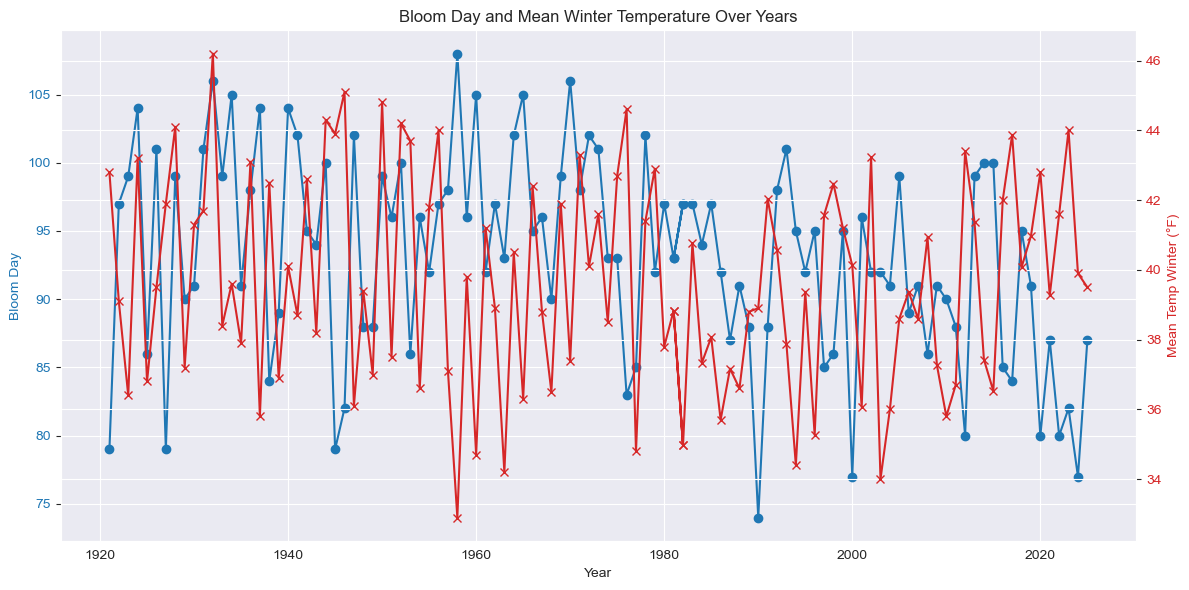

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(cherry_df['year'], cherry_df['bloom_day'], marker='o')
plt.title('Bloom Day Over Years')
plt.xlabel('Year')
plt.ylabel('Bloom Day')
plt.grid(True)
plt.show()

# Plot mean_temp_winter and bloom_day together
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Bloom Day', color=color)
ax1.plot(cherry_df['year'], cherry_df['bloom_day'], color=color, marker='o', label='Bloom Day')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Mean Temp Winter (°F)', color=color)
ax2.plot(cherry_df['year'], cherry_df['mean_temp_winter'], color=color, marker='x', label='Mean Temp Winter')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Bloom Day and Mean Winter Temperature Over Years')
fig.tight_layout()
plt.show()


## 5. Feature Importance (Correlation with Bloom Day)

Show features most correlated with bloom_day.

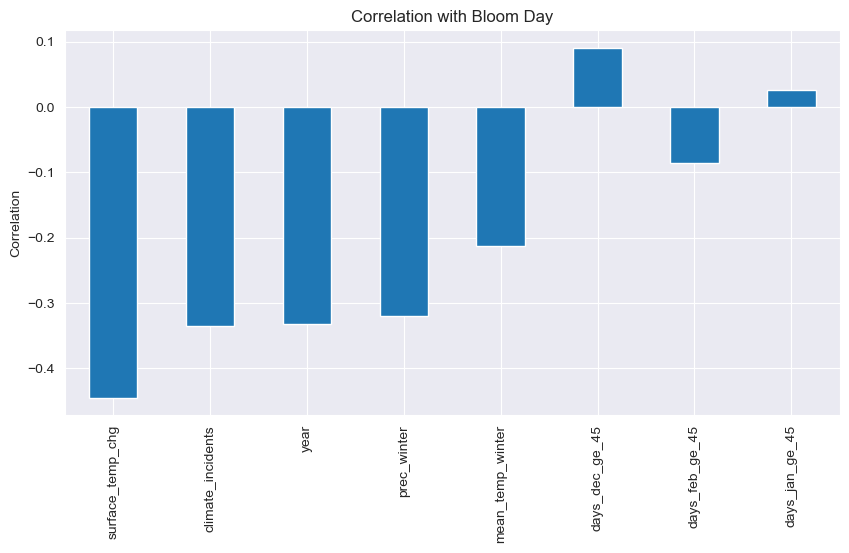

surface_temp_chg    -0.444677
climate_incidents   -0.334359
year                -0.331557
prec_winter         -0.320192
mean_temp_winter    -0.213367
days_dec_ge_45       0.090658
days_feb_ge_45      -0.085140
days_jan_ge_45       0.025429
Name: bloom_day, dtype: float64

In [6]:
bloom_corr = corr['bloom_day'].drop('bloom_day').sort_values(key=abs, ascending=False)
bloom_corr.plot(kind='bar', figsize=(10, 5), title='Correlation with Bloom Day')
plt.ylabel('Correlation')
plt.show()

bloom_corr


## 6. Pairplot of Key Features

Visualize pairwise relationships between bloom_day and top correlated features.

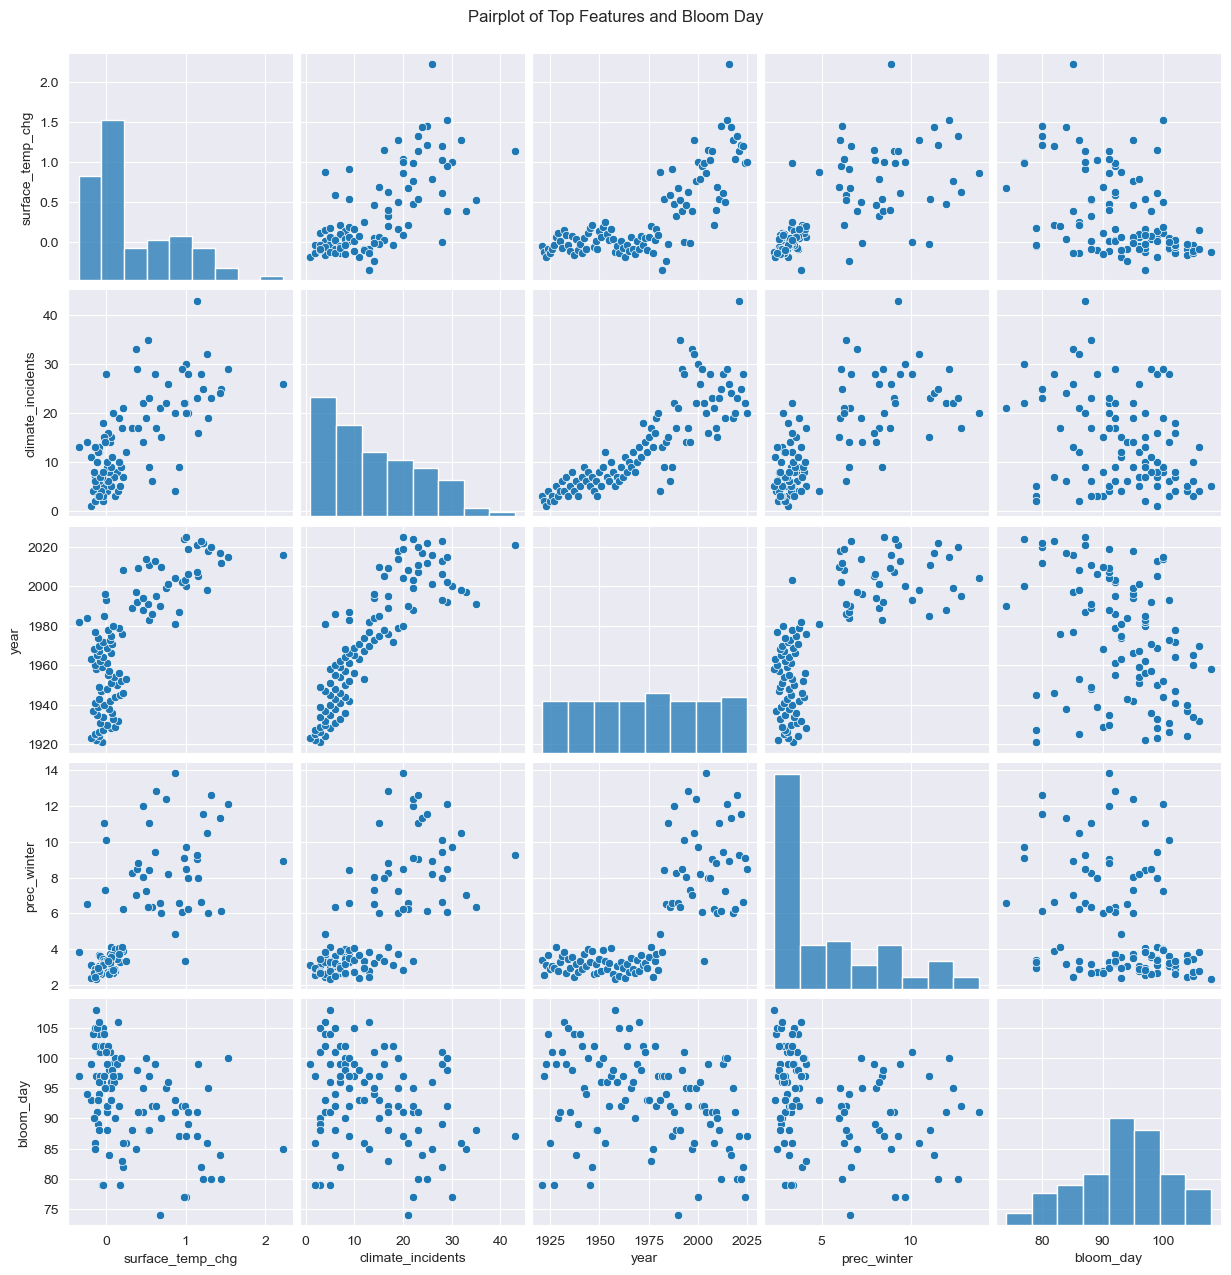

In [7]:
top_features = bloom_corr.index[:4].tolist() + ['bloom_day']
sns.pairplot(cherry_df[top_features])
plt.suptitle('Pairplot of Top Features and Bloom Day', y=1.02)
plt.show()


## 7. Outlier Detection

Visualize outliers in bloom_day and other key features.

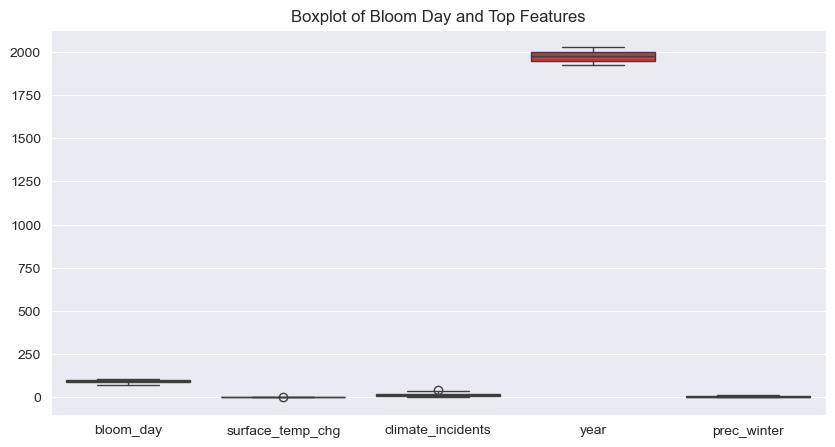

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=cherry_df[['bloom_day'] + top_features[:-1]])
plt.title('Boxplot of Bloom Day and Top Features')
plt.show()


## 8. Climate Incidents and Bloom Day

Explore the relationship between climate incidents and bloom day.

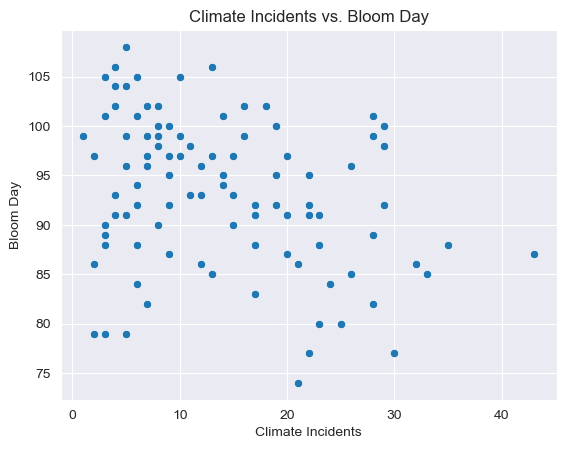

In [9]:
sns.scatterplot(x='climate_incidents', y='bloom_day', data=cherry_df)
plt.title('Climate Incidents vs. Bloom Day')
plt.xlabel('Climate Incidents')
plt.ylabel('Bloom Day')
plt.show()


## 9. Conclusions

- The dataset shows several features with correlation to bloom day, especially climate incidents and surface temperature change.
- There are clear trends and some outliers in the data.
- Further modeling can focus on the most important features identified above.
- Future work could include time series analysis and predictive modeling based on weather patterns.
